In [1]:
## importing required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import string
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)
#!pip install praw
#!pip install textblob
import praw
import csv

## Section 1: Web Scrape from Reddit API 

In [2]:
# Reddit API credentials
client_id = "2vn4cmesN5c4WZbMgGsRqw"
client_secret = "8AfBfFIo75hUqQMGtzXkEyqIBQRgPQ"
user_agent = "OmApp1"

# Initialize Reddit instance
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret, user_agent=user_agent)

# Fetch Reddit post and comments
def fetch_comments(post_url):
    submission = reddit.submission(url=post_url)
    submission.comments.replace_more(limit=None)
    comments = submission.comments.list()
    return comments

# Save comments to a CSV file
def save_comments_to_csv(comments, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Comment', 'Author', 'Score', 'Upvotes', 'Downvotes'])
        for comment in comments:
            writer.writerow([comment.body, comment.author, comment.score, comment.ups, comment.downs])

# Example usage
post_url = "https://www.reddit.com/r/ireland/comments/120ip8l/if_you_have_an_opinion_on_how_ireland_should/"
comments = fetch_comments(post_url)
save_comments_to_csv(comments, 'reddit_comments_ireland.csv')


## Section 2: Sentiment Analysis on Ireland comments on Construction crisis

In [3]:
df= pd.read_csv("reddit_comments_ireland.csv") ## reading csv file as pandas dataframe

In [4]:
df.head() ## verifying first 5 rows of data frame

,Comment,Author,Score,Upvotes,Downvotes
0,I'd go with David McWiĺiams' answer. A factory...,shevek65,64,64,0
1,Add scallions to your mash.,90000001127,26,26,0
2,The first and easiest thing to do would be to ...,KillerKlown88,69,69,0
3,I've filled out the form. What I would do is;\...,IronicallyBad90,30,30,0
4,(from the site) \n\n\nThis consultation is be...,bigvalen,8,8,0


In [5]:
df.shape ## verifying number of rows and columns in data frame

(117, 5)

In [6]:
df.info() ## verifying each column count and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    117 non-null    object
 1   Author     115 non-null    object
 2   Score      117 non-null    int64 
 3   Upvotes    117 non-null    int64 
 4   Downvotes  117 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ KB


In [7]:
df["Score"].unique() ## verifying Score column labels

array([ 64,  26,  69,  30,   8,  19,  22,   5,   4,   6,   3,  15,   2,
         1,   0,  -3,  -8,  25,  -4,  18,   9, -15,  -5,  -2], dtype=int64)

In [8]:
df["Upvotes"].unique() ## verifying Upvotes column labels

array([ 64,  26,  69,  30,   8,  19,  22,   5,   4,   6,   3,  15,   2,
         1,   0,  -3,  -8,  25,  -4,  18,   9, -15,  -5,  -2], dtype=int64)

In [9]:
df["Downvotes"].unique()  ## verifying Downvotes column labels

array([0], dtype=int64)

In [10]:
## verifying count of missing values in each column and percentage 

count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys = ['count', 'percentage'])
print('Count and Percentage of missing values for the columns: ')
missing_data

Count and Percentage of missing values for the columns: 


,count,percentage
Author,2,1.709402
Comment,0,0.000000
Score,0,0.000000
Upvotes,0,0.000000
Downvotes,0,0.000000


In [11]:
df=df.dropna() ## drop the missing values

In [12]:
df.isnull().sum() ## re validating after drop

Comment      0
Author       0
Score        0
Upvotes      0
Downvotes    0
dtype: int64

In [13]:
df.columns = df.columns.str.strip() ## removing any leading and trailing whitespace from the strings.

In [14]:
df.head() ## validating after removing any leading and trailing whitespace from the strings.

,Comment,Author,Score,Upvotes,Downvotes
0,I'd go with David McWiĺiams' answer. A factory...,shevek65,64,64,0
1,Add scallions to your mash.,90000001127,26,26,0
2,The first and easiest thing to do would be to ...,KillerKlown88,69,69,0
3,I've filled out the form. What I would do is;\...,IronicallyBad90,30,30,0
4,(from the site) \n\n\nThis consultation is be...,bigvalen,8,8,0


Percentage for default

Score
 1     44.35
 2      8.70
 0      8.70
 8      6.09
 4      4.35
 3      4.35
 6      3.48
 19     2.61
 5      2.61
 15     2.61
 25     0.87
-5      0.87
-15     0.87
 9      0.87
 18     0.87
-4      0.87
 64     0.87
-8      0.87
-3      0.87
 26     0.87
 22     0.87
 30     0.87
 69     0.87
-2      0.87
Name: proportion, dtype: float64


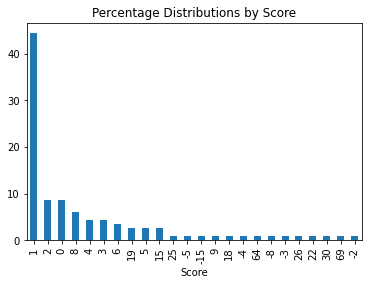

In [15]:
## Normalize the score data and display in a bar plot.
print('Percentage for default\n')
print(round(df.Score.value_counts(normalize=True)*100,2))
round(df.Score.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by Score')
plt.show()

In [16]:
df.columns ## verifying data frame columns

Index(['Comment', 'Author', 'Score', 'Upvotes', 'Downvotes'], dtype='object')

In [17]:
df['Score'].value_counts().sort_index() ## sorting Score column data 

Score
-15     1
-8      1
-5      1
-4      1
-3      1
-2      1
 0     10
 1     51
 2     10
 3      5
 4      5
 5      3
 6      4
 8      7
 9      1
 15     3
 18     1
 19     3
 22     1
 25     1
 26     1
 30     1
 64     1
 69     1
Name: count, dtype: int64

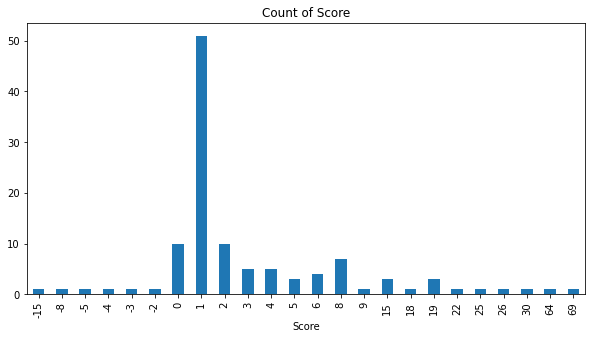

In [18]:
## score values display as a bar plot

it = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title = 'Count of Score',
          figsize = (10,5))
it.set_xlabel('Score')
plt.show()

In [19]:
# Apply first level cleaning
Comment = 'text'
#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_1(x)

In [20]:
##  Applying above function to Comment column and create a new column Comment1 and verying with head funtion.
df['Comment1'] = pd.DataFrame(df.Comment.apply(cleaned1))
df.head(10)

,Comment,Author,Score,Upvotes,Downvotes,Comment1
0,I'd go with David McWiĺiams' answer. A factory...,shevek65,64,64,0,id go with david mcwiĺiams answer a factory in...
1,Add scallions to your mash.,90000001127,26,26,0,add scallions to your mash
2,The first and easiest thing to do would be to ...,KillerKlown88,69,69,0,the first and easiest thing to do would be to ...
3,I've filled out the form. What I would do is;\...,IronicallyBad90,30,30,0,ive filled out the form what i would do is\n\n...
4,(from the site) \n\n\nThis consultation is be...,bigvalen,8,8,0,from the site \n\n\nthis consultation is bein...
5,Government overriding planning rejections base...,irish_guy,19,19,0,government overriding planning rejections base...
6,"I will probably be downvoted to hell, but mayb...",paracrime,22,22,0,i will probably be downvoted to hell but maybe...
7,"Planned expansion of our cities, and possible ...",Saoi_,5,5,0,planned expansion of our cities and possible n...
8,Taiwan fits 23 million people on an island of ...,Acegonia,4,4,0,taiwan fits million people on an island of ro...
9,Cut VAT on all new builds. Make all long term ...,Dangerous-Shirt-7384,5,5,0,cut vat on all new builds make all long term n...


In [21]:
## The re.sub() function replaces all occurrences of characters with an empty string, effectively removing them from the text.

def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [22]:
## ##  Applying above function to Comment1 column and create a new  cleaned_Comment1 and verying with head funtion.
df['cleaned_Comment1'] = pd.DataFrame(df['Comment1'].apply(cleaned2))
df.head()

,Comment,Author,Score,Upvotes,Downvotes,Comment1,cleaned_Comment1
0,I'd go with David McWiĺiams' answer. A factory...,shevek65,64,64,0,id go with david mcwiĺiams answer a factory in...,id go with david mcwiĺiams answer a factory in...
1,Add scallions to your mash.,90000001127,26,26,0,add scallions to your mash,add scallions to your mash
2,The first and easiest thing to do would be to ...,KillerKlown88,69,69,0,the first and easiest thing to do would be to ...,the first and easiest thing to do would be to ...
3,I've filled out the form. What I would do is;\...,IronicallyBad90,30,30,0,ive filled out the form what i would do is\n\n...,ive filled out the form what i would do is vac...
4,(from the site) \n\n\nThis consultation is be...,bigvalen,8,8,0,from the site \n\n\nthis consultation is bein...,from the site this consultation is being carr...


In [23]:
df.info() ##verifying cleaned_comment1 data type

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 116
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Comment           115 non-null    object
 1   Author            115 non-null    object
 2   Score             115 non-null    int64 
 3   Upvotes           115 non-null    int64 
 4   Downvotes         115 non-null    int64 
 5   Comment1          115 non-null    object
 6   cleaned_Comment1  115 non-null    object
dtypes: int64(3), object(4)
memory usage: 7.2+ KB


In [24]:
##  converting cleaned_comment1 data type to string

df['cleaned_Comment1'] = df['cleaned_Comment1'].astype(str) 

In [25]:
## Apply tokenizer method to cleaned_comment1
tokenizer = df['cleaned_Comment1']
print(tokenizer)

0      id go with david mcwiĺiams answer a factory in...
1                             add scallions to your mash
2      the first and easiest thing to do would be to ...
3      ive filled out the form what i would do is vac...
4      from the site  this consultation is being carr...
                             ...                        
112    he isnt planning to stay in retail forever but...
113    noi used the word state you used government wh...
114    not at age  if hes not motivated to do it then...
115    € isnt plenty at  if you are leaving a job ear...
116    no i agree in general just not in the case of ...
Name: cleaned_Comment1, Length: 115, dtype: object


In [26]:
## dropping unwanted columns from data frame

df=df.drop(["Comment","Author","Upvotes","Downvotes", "Comment1"], axis=1)

In [27]:
df.head()

,Score,cleaned_Comment1
0,64,id go with david mcwiĺiams answer a factory in...
1,26,add scallions to your mash
2,69,the first and easiest thing to do would be to ...
3,30,ive filled out the form what i would do is vac...
4,8,from the site this consultation is being carr...


## Feature engineering

In [28]:
df["Score"].unique()

array([ 64,  26,  69,  30,   8,  19,  22,   5,   4,   6,   3,  15,   2,
         1,   0,  -3,  -8,  25,  -4,  18,   9, -15,  -5,  -2], dtype=int64)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoder = LabelEncoder() ## creating object 

In [31]:
## applying label_encoder to score column
df['Score'] = label_encoder.fit_transform(df['Score'])

In [32]:
df['Score'].unique() ## verifying the score column labels after label encoding

array([22, 20, 23, 21, 13, 17, 18, 11, 10, 12,  9, 15,  8,  7,  6,  4,  1,
       19,  3, 16, 14,  0,  2,  5], dtype=int64)

In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 116
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Score             115 non-null    int64 
 1   cleaned_Comment1  115 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [34]:
#df['Score'].value_counts() 

## Sentiment analysis using TfidfVectorizer

In [35]:
## Importing train_test_split library for splitting data frame as train and test sets.

from sklearn.model_selection import train_test_split

Independent_var = df.cleaned_Comment1
Dependent_var = df.Score

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.20, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 92
IV_test  : 23
DV_train : 92
DV_test  : 23


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
## Create TfidfVectorizer and LogisticRegression objects
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [38]:
## fitting the model and display confusion matric with model predictions

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  2, 10,  1,  1,  1,  1,  2,  1,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [39]:
## printing Accuracy, Precision and Recall of the model

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.43478260869565216
Precision :  1.0
Recall :  0.43478260869565216


In [40]:
## verify the model accuracy by putting some randam comment
example = ["not at age  if hes not motivated to do it then"]
result = model.predict(example)
print(result)

[7]


## VADER Sentiment Scoring

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [42]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_Comment1']
    myid = row['Score']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/115 [00:00<?, ?it/s]

In [43]:
## reading polarity score as a dataframe 
vaders = pd.DataFrame(res).T 
vaders = vaders.reset_index().rename(columns={'index': 'Score'})
vaders = vaders.merge(df, how='left') ## merging vaders dataframe with original dataframe

In [44]:
vaders.head()

,Score,neg,neu,pos,compound,cleaned_Comment1
0,22,0.000,1.000,0.000,0.0000,id go with david mcwiĺiams answer a factory in...
1,20,0.000,1.000,0.000,0.0000,add scallions to your mash
2,23,0.000,0.762,0.238,0.8225,the first and easiest thing to do would be to ...
3,21,0.048,0.777,0.175,0.9545,ive filled out the form what i would do is vac...
4,13,0.000,0.924,0.076,0.3182,from the site this consultation is being carr...


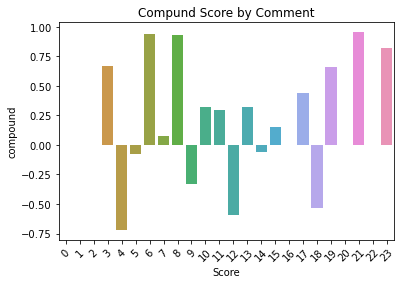

In [45]:
## display vaders data as barplot

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Comment')
ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.show()

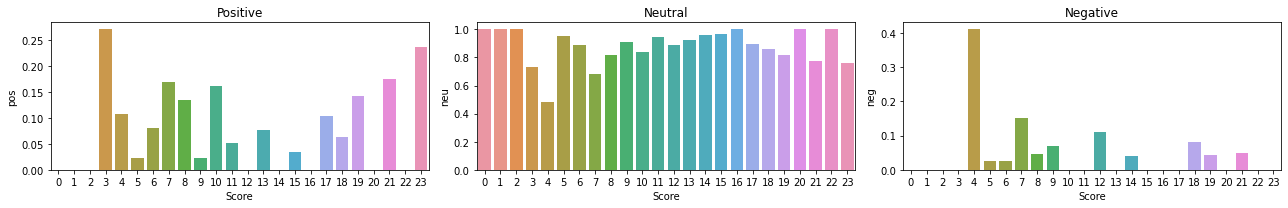

In [46]:
## finally we disply the scores as Poitive, Neutral and Negative barplots

fig, axs = plt.subplots(1, 3, figsize=(18, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Section 3: Sentiment Analysis on Australia comments on Construction crisis

In [47]:
df= pd.read_csv("reddit_comments_australia.csv") ## reading csv file as pandas dataframe

In [48]:
df.head() ## verifying first 5 rows of data frame

,Comment,Author,Score,Upvotes,Downvotes
0,And massive builders going under left and righ...,Bosde,18,18,0
1,We keep getting told it's a supply/demand issu...,Universal-Cereal-Bus,209,209,0
2,My theory for the rental crisis is that all th...,Relative_Mulberry_71,36,36,0
3,We are sleeping in our cars & working full tim...,herparerpera,38,38,0
4,"""Construction""?\n\nYou mean monopolized sub-di...",Gengar0,61,61,0


In [49]:
df.shape ## verifying number of rows and columns in data frame

(179, 5)

In [50]:
df.info() ## verifying each column count and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    179 non-null    object
 1   Author     168 non-null    object
 2   Score      179 non-null    int64 
 3   Upvotes    179 non-null    int64 
 4   Downvotes  179 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.1+ KB


In [51]:
df["Score"].unique() ## verifying Score column labels

array([ 18, 209,  36,  38,  61,  79,   7,  25,   5,  26,   4,  10,  39,
         3,  24,  21,   2,   6,   1, 119,  46,  17,  13,  -1,  11,  -8,
        30,   9,   8,  -4,  12,   0,  40,  16,  15,  32,  14], dtype=int64)

In [52]:
df["Upvotes"].unique() ## verifying Upvotes column labels

array([ 18, 209,  36,  38,  61,  79,   7,  25,   5,  26,   4,  10,  39,
         3,  24,  21,   2,   6,   1, 119,  46,  17,  13,  -1,  11,  -8,
        30,   9,   8,  -4,  12,   0,  40,  16,  15,  32,  14], dtype=int64)

In [53]:
df["Downvotes"].unique()  ## verifying Downvotes column labels

array([0], dtype=int64)

In [54]:
## verifying count of missing values in each column and percentage 

count = df.isnull().sum().sort_values(ascending=False)
percentage = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys = ['count', 'percentage'])
print('Count and Percentage of missing values for the columns: ')
missing_data

Count and Percentage of missing values for the columns: 


,count,percentage
Author,11,6.145251
Comment,0,0.000000
Score,0,0.000000
Upvotes,0,0.000000
Downvotes,0,0.000000


In [55]:
df=df.dropna() ## drop the missing values

In [56]:
df.isnull().sum() ## re validating after drop

Comment      0
Author       0
Score        0
Upvotes      0
Downvotes    0
dtype: int64

In [57]:
df.columns = df.columns.str.strip() ## removing any leading and trailing whitespace from the strings.

In [58]:
df.head() ## validating after removing any leading and trailing whitespace from the strings.

,Comment,Author,Score,Upvotes,Downvotes
0,And massive builders going under left and righ...,Bosde,18,18,0
1,We keep getting told it's a supply/demand issu...,Universal-Cereal-Bus,209,209,0
2,My theory for the rental crisis is that all th...,Relative_Mulberry_71,36,36,0
3,We are sleeping in our cars & working full tim...,herparerpera,38,38,0
4,"""Construction""?\n\nYou mean monopolized sub-di...",Gengar0,61,61,0


Percentage for default

Score
 1      22.62
 2      13.69
 4       8.93
 3       7.74
 7       5.36
 5       5.36
 6       4.17
 9       3.57
 11      2.98
 10      2.98
 12      2.38
 17      1.79
 0       1.79
 16      1.79
 13      1.19
 25      1.19
 18      1.19
-8       0.60
 40      0.60
 15      0.60
 32      0.60
-4       0.60
 14      0.60
 30      0.60
 46      0.60
-1       0.60
 209     0.60
 119     0.60
 21      0.60
 24      0.60
 26      0.60
 79      0.60
 61      0.60
 38      0.60
 36      0.60
 8       0.60
Name: proportion, dtype: float64


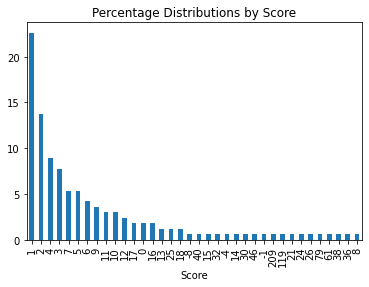

In [59]:
## Normalize the score data and display in a bar plot.
print('Percentage for default\n')
print(round(df.Score.value_counts(normalize=True)*100,2))
round(df.Score.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by Score')
plt.show()

In [60]:
df.columns ## verifying data frame columns

Index(['Comment', 'Author', 'Score', 'Upvotes', 'Downvotes'], dtype='object')

In [61]:
df['Score'].value_counts().sort_index() ## sorting Score column data 

Score
-8       1
-4       1
-1       1
 0       3
 1      38
 2      23
 3      13
 4      15
 5       9
 6       7
 7       9
 8       1
 9       6
 10      5
 11      5
 12      4
 13      2
 14      1
 15      1
 16      3
 17      3
 18      2
 21      1
 24      1
 25      2
 26      1
 30      1
 32      1
 36      1
 38      1
 40      1
 46      1
 61      1
 79      1
 119     1
 209     1
Name: count, dtype: int64

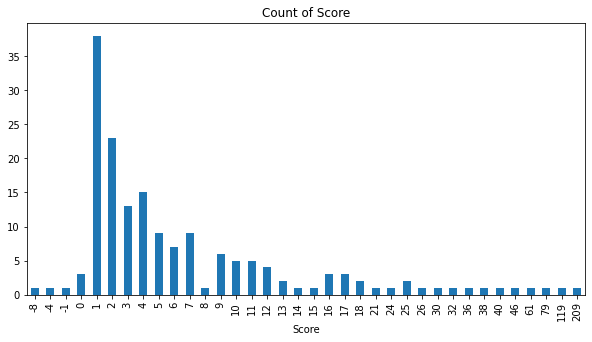

In [62]:
## score values display as a bar plot

it = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title = 'Count of Score',
          figsize = (10,5))
it.set_xlabel('Score')
plt.show()

In [63]:
# Apply first level cleaning
Comment = 'text'
#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
cleaned1 = lambda x: text_clean_1(x)

In [64]:
##  Applying above function to Comment column and create a new column Comment1 and verying with head funtion.
df['Comment1'] = pd.DataFrame(df.Comment.apply(cleaned1))
df.head(10)

,Comment,Author,Score,Upvotes,Downvotes,Comment1
0,And massive builders going under left and righ...,Bosde,18,18,0,and massive builders going under left and righ...
1,We keep getting told it's a supply/demand issu...,Universal-Cereal-Bus,209,209,0,we keep getting told its a supplydemand issue ...
2,My theory for the rental crisis is that all th...,Relative_Mulberry_71,36,36,0,my theory for the rental crisis is that all th...
3,We are sleeping in our cars & working full tim...,herparerpera,38,38,0,we are sleeping in our cars working full time...
4,"""Construction""?\n\nYou mean monopolized sub-di...",Gengar0,61,61,0,construction\n\nyou mean monopolized subdivisi...
5,Construction is only part of the solution. As ...,GrizzlyBear74,79,79,0,construction is only part of the solution as l...
6,Houses looked like they might fall in price so...,Patient_Pop9487,7,7,0,houses looked like they might fall in price so...
8,"Airbnb owners: Yes, it's construction. Please ...",SaltpeterSal,5,5,0,airbnb owners yes its construction please cons...
9,What do you expect? Melbourne has increased it...,karchaross,5,5,0,what do you expect melbourne has increased its...
10,and yet this subreddit largely continues to av...,NoLeafClover777,26,26,0,and yet this subreddit largely continues to av...


In [65]:
## The re.sub() function replaces all occurrences of characters with an empty string, effectively removing them from the text.

def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [66]:
## ##  Applying above function to Comment1 column and create a new  cleaned_Comment1 and verying with head funtion.
df['cleaned_Comment1'] = pd.DataFrame(df['Comment1'].apply(cleaned2))
df.head()

,Comment,Author,Score,Upvotes,Downvotes,Comment1,cleaned_Comment1
0,And massive builders going under left and righ...,Bosde,18,18,0,and massive builders going under left and righ...,and massive builders going under left and righ...
1,We keep getting told it's a supply/demand issu...,Universal-Cereal-Bus,209,209,0,we keep getting told its a supplydemand issue ...,we keep getting told its a supplydemand issue ...
2,My theory for the rental crisis is that all th...,Relative_Mulberry_71,36,36,0,my theory for the rental crisis is that all th...,my theory for the rental crisis is that all th...
3,We are sleeping in our cars & working full tim...,herparerpera,38,38,0,we are sleeping in our cars working full time...,we are sleeping in our cars working full time...
4,"""Construction""?\n\nYou mean monopolized sub-di...",Gengar0,61,61,0,construction\n\nyou mean monopolized subdivisi...,constructionyou mean monopolized subdivisions ...


In [67]:
df.info() ##verifying cleaned_comment1 data type

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 178
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Comment           168 non-null    object
 1   Author            168 non-null    object
 2   Score             168 non-null    int64 
 3   Upvotes           168 non-null    int64 
 4   Downvotes         168 non-null    int64 
 5   Comment1          168 non-null    object
 6   cleaned_Comment1  168 non-null    object
dtypes: int64(3), object(4)
memory usage: 10.5+ KB


In [68]:
##  converting cleaned_comment1 data type to string

df['cleaned_Comment1'] = df['cleaned_Comment1'].astype(str) 

In [69]:
## Apply tokenizer method to cleaned_comment1
tokenizer = df['cleaned_Comment1']
print(tokenizer)

0      and massive builders going under left and righ...
1      we keep getting told its a supplydemand issue ...
2      my theory for the rental crisis is that all th...
3      we are sleeping in our cars  working full time...
4      constructionyou mean monopolized subdivisions ...
                             ...                        
174    well it works out annually around  people whic...
175    but do we need the growth or does australia ju...
176    historical comparison needs to be in context a...
177    there is a higher economic risk from a falling...
178    i think the issue is what is the right mix a h...
Name: cleaned_Comment1, Length: 168, dtype: object


In [70]:
## dropping unwanted columns from data frame

df=df.drop(["Comment","Author","Upvotes","Downvotes", "Comment1"], axis=1)

In [71]:
df.head()

,Score,cleaned_Comment1
0,18,and massive builders going under left and righ...
1,209,we keep getting told its a supplydemand issue ...
2,36,my theory for the rental crisis is that all th...
3,38,we are sleeping in our cars working full time...
4,61,constructionyou mean monopolized subdivisions ...


## Feature engineering

In [72]:
df["Score"].unique()

array([ 18, 209,  36,  38,  61,  79,   7,   5,  26,   4,  10,   3,  24,
        21,   2,   6,   1, 119,  46,  17,  13,  -1,  25,  11,  -8,  30,
        -4,  12,   9,   0,  40,  16,  15,  32,  14,   8], dtype=int64)

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
label_encoder = LabelEncoder() ## creating object 

In [75]:
## applying label_encoder to score column
df['Score'] = label_encoder.fit_transform(df['Score'])

In [76]:
df['Score'].unique() ## verifying the score column labels after label encoding

array([21, 35, 28, 29, 32, 33, 10,  8, 25,  7, 13,  6, 23, 22,  5,  9,  4,
       34, 31, 20, 16,  2, 24, 14,  0, 26,  1, 15, 12,  3, 30, 19, 18, 27,
       17, 11], dtype=int64)

In [77]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 178
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Score             168 non-null    int64 
 1   cleaned_Comment1  168 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [78]:
#df['Score'].value_counts() 

## Sentiment analysis using TfidfVectorizer

In [79]:
## Importing train_test_split library for splitting data frame as train and test sets.

from sklearn.model_selection import train_test_split

Independent_var = df.cleaned_Comment1
Dependent_var = df.Score

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.20, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 134
IV_test  : 34
DV_train : 134
DV_test  : 34


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [81]:
## Create TfidfVectorizer and LogisticRegression objects
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [82]:
## fitting the model and display confusion matric with model predictions

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[10,  6,  1,  3,  1,  2,  2,  1,  2,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [83]:
## printing Accuracy, Precision and Recall of the model
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.29411764705882354
Precision :  1.0
Recall :  0.29411764705882354


In [84]:
## verify the model accuracy by putting some randam comment
example = ["not at age  if hes not motivated to do it then"]
result = model.predict(example)
print(result)

[4]


## VADER Sentiment Scoring

In [85]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [86]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_Comment1']
    myid = row['Score']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/168 [00:00<?, ?it/s]

In [87]:
## reading polarity score as a dataframe 
vaders = pd.DataFrame(res).T 
vaders = vaders.reset_index().rename(columns={'index': 'Score'})
vaders = vaders.merge(df, how='left') ## merging vaders dataframe with original dataframe

In [88]:
vaders.head()

,Score,neg,neu,pos,compound,cleaned_Comment1
0,21,0.171,0.763,0.067,-0.9750,and massive builders going under left and righ...
1,21,0.171,0.763,0.067,-0.9750,negative gearing needs to be capped or limited...
2,35,0.147,0.820,0.033,-0.8462,we keep getting told its a supplydemand issue ...
3,28,0.114,0.886,0.000,-0.6249,my theory for the rental crisis is that all th...
4,29,0.169,0.745,0.086,-0.6705,we are sleeping in our cars working full time...


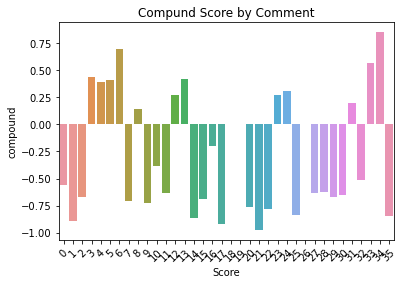

In [89]:
## display vaders data as barplot

ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Comment')
ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.show()

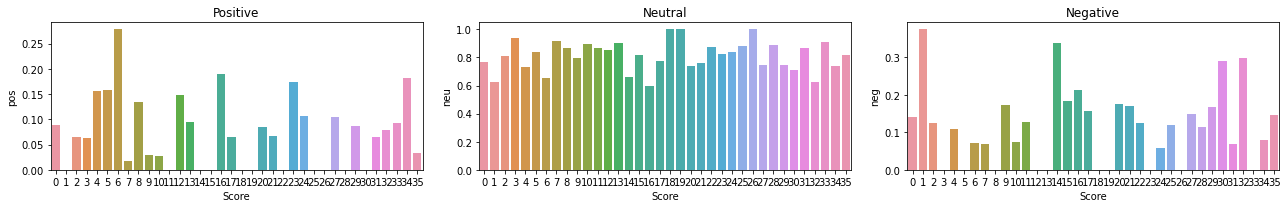

In [90]:
## finally we disply the scores as Poitive, Neutral and Negative barplots

fig, axs = plt.subplots(1, 3, figsize=(18, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()